In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [5]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [6]:
mensual_p = mensual['n_trips']

In [7]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [8]:
mensual_p = mensual_p.reset_index()

In [9]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [280]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 1000, mcmc_samples=100, interval_width= 0.7, seasonality_prior_scale=2,changepoint_prior_scale =0.04)

# Entrenamos el modelo
prophet_1.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_1.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/pa2e8xsg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/_gksc7yk.json
01:16:56 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=19495', 'data', 'file=/tmp/tmplnvzjdhf/pa2e8xsg.json', 'init=/tmp/tmplnvzjdhf/_gksc7yk.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelo3jrnqlx/prophet_model-20241119011656_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=19495', 'data', 'file=/tmp/tmplnvzjdhf/pa2e8xsg.json', 'init=/tmp/tmplnvzjdhf/_gksc7yk.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelo3jrnqlx/prophet_model-20241119011656_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

01:16:58 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=19495', 'data', 'file=/tmp/tmplnvzjdhf/pa2e8xsg.json', 'init=/tmp/tmplnvzjdhf/_gksc7yk.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelo3jrnqlx/prophet_model-20241119011656_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modelo3jrnqlx/prophet_model-20241119011656_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modelo3jrnqlx/prophet_model-20241119011656_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [281]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.835219e+06,2.964951e+06,3.191646e+06,2.767750e+06,2.905418e+06,239116.436959,162104.142212,316763.473550,239116.436959,162104.142212,316763.473550,0.0,0.0,0.0,3.074336e+06
1,2022-04-30,2.820505e+06,2.854416e+06,3.088535e+06,2.762064e+06,2.886442e+06,153968.384698,93491.107133,233194.738210,153968.384698,93491.107133,233194.738210,0.0,0.0,0.0,2.974473e+06
2,2022-05-31,2.805300e+06,2.913726e+06,3.152479e+06,2.747155e+06,2.873901e+06,229685.334003,155203.451518,302458.567550,229685.334003,155203.451518,302458.567550,0.0,0.0,0.0,3.034986e+06
3,2022-06-30,2.790718e+06,2.815198e+06,3.036835e+06,2.731272e+06,2.853561e+06,130320.855702,64294.280601,195311.928918,130320.855702,64294.280601,195311.928918,0.0,0.0,0.0,2.921039e+06
4,2022-07-31,2.774814e+06,2.463499e+06,2.710000e+06,2.718588e+06,2.839376e+06,-188768.595885,-263254.523832,-111249.587156,-188768.595885,-263254.523832,-111249.587156,0.0,0.0,0.0,2.586045e+06
5,2022-08-31,2.757778e+06,2.405930e+06,2.641058e+06,2.701446e+06,2.821818e+06,-227374.871669,-305138.441632,-155601.331613,-227374.871669,-305138.441632,-155601.331613,0.0,0.0,0.0,2.530404e+06
6,2022-09-30,2.740684e+06,2.393523e+06,2.659188e+06,2.683250e+06,2.800916e+06,-216137.165972,-310662.098653,-138587.317687,-216137.165972,-310662.098653,-138587.317687,0.0,0.0,0.0,2.524547e+06
7,2022-10-31,2.721909e+06,2.807405e+06,3.103075e+06,2.660905e+06,2.776982e+06,238876.240401,114441.041315,366621.637290,238876.240401,114441.041315,366621.637290,0.0,0.0,0.0,2.960785e+06
8,2022-11-30,2.702927e+06,2.498487e+06,2.751462e+06,2.644280e+06,2.757993e+06,-73527.175622,-151663.235427,11230.293221,-73527.175622,-151663.235427,11230.293221,0.0,0.0,0.0,2.629400e+06
9,2022-12-31,2.683298e+06,2.603870e+06,2.881127e+06,2.625893e+06,2.735580e+06,59064.472979,-34422.102507,147969.857659,59064.472979,-34422.102507,147969.857659,0.0,0.0,0.0,2.742363e+06


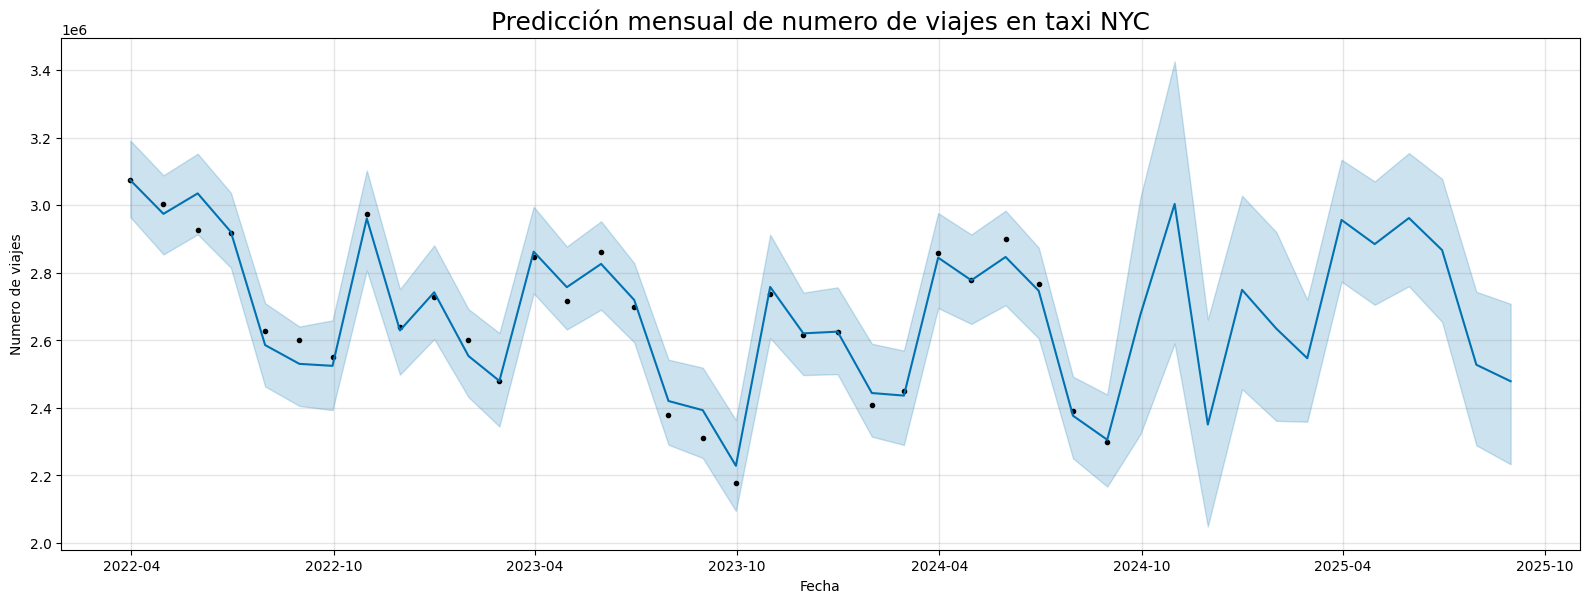

In [282]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

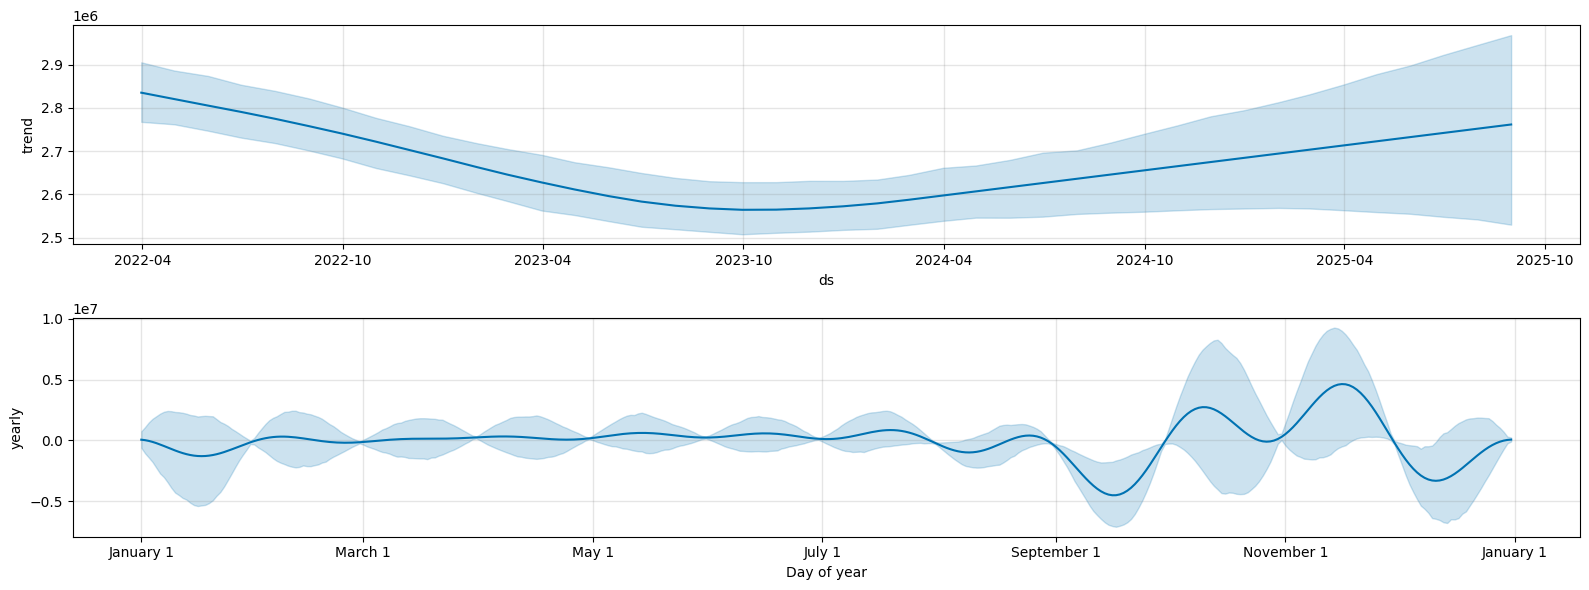

In [283]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Evaluacion

In [284]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [285]:
df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/jim854d6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/tpbd4ojm.json
01:16:59 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=36623', 'data', 'file=/tmp/tmplnvzjdhf/jim854d6.json', 'init=/tmp/tmplnvzjdhf/tpbd4ojm.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelaxoiemjn/prophet_model-20241119011659_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=36623', 'data', 'file=/tmp/tmplnvzjdhf/jim854d6.json', 'init=/tmp/tmplnvzjdhf/tpbd4ojm.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelaxoiemjn/prophet_model-20241119011659_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

01:17:02 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=36623', 'data', 'file=/tmp/tmplnvzjdhf/jim854d6.json', 'init=/tmp/tmplnvzjdhf/tpbd4ojm.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelaxoiemjn/prophet_model-20241119011659_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modelaxoiemjn/prophet_model-20241119011659_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modelaxoiemjn/prophet_model-20241119011659_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [286]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-09-30,2.032273e+06,1.318681e+06,2.689429e+06,2179200,2023-09-01
1,2023-10-31,2.840398e+06,2.152245e+06,3.471697e+06,2736389,2023-09-01
2,2023-11-30,2.531002e+06,1.895413e+06,3.121613e+06,2616757,2023-09-01
3,2023-12-31,2.606545e+06,2.086910e+06,3.132135e+06,2625768,2023-09-01
4,2024-01-31,2.299721e+06,1.567344e+06,2.975212e+06,2409342,2023-09-01
5,2024-02-29,2.770925e+06,1.557893e+06,4.102729e+06,2448952,2023-09-01
6,2024-03-31,2.694504e+06,1.995108e+06,3.291749e+06,2858661,2023-09-01
7,2024-04-30,2.565590e+06,1.869878e+06,3.168445e+06,2777362,2023-09-01
8,2024-05-31,2.030438e+06,1.334368e+06,2.651360e+06,2899539,2023-09-01
9,2024-06-30,2.250956e+06,1.539898e+06,2.892438e+06,2767032,2023-09-01


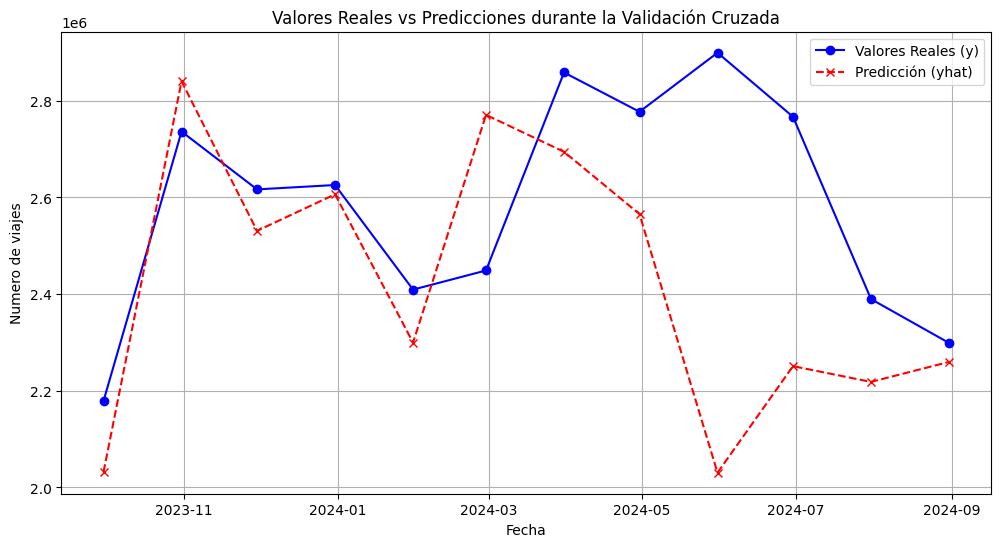

In [287]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


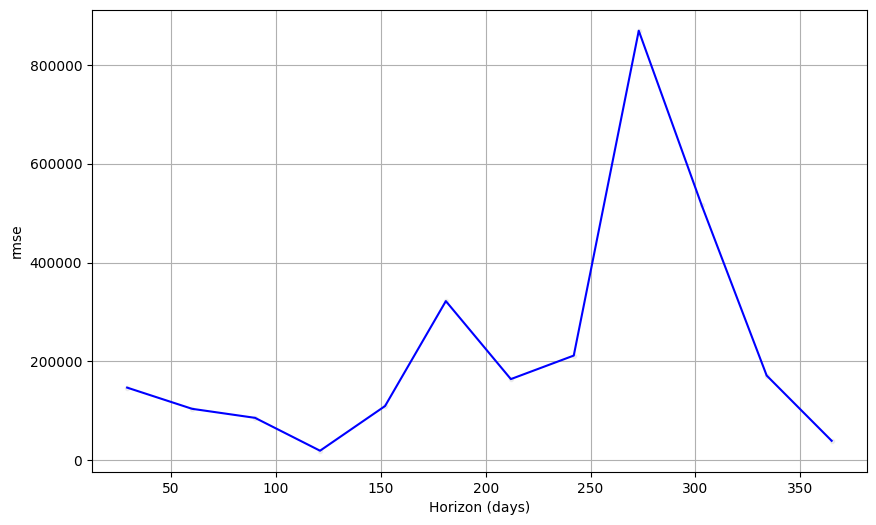

In [288]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [289]:
df_p_1 = performance_metrics(df_cv_1)

In [290]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 229939.1832474631


In [291]:
print('El MAE es:', df_p_1.mae.mean())

El MAE es: 229939.1832474631


In [292]:
print('La cobertura es:', df_p_1.coverage.mean())

La cobertura es: 0.9166666666666666


In [293]:
print('La MAPE es:', df_p_1.mape.mean())

La MAPE es: 0.08593462306097614


In [294]:
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,196 days 20:00:00,1.066825e+11,229939.183247,229939.183247,0.085935,0.085935,0.092161,0.916667
std,109 days 20:33:46.987269072,2.174282e+11,242285.737228,242285.737228,0.083683,0.083683,0.097754,0.288675
min,29 days 00:00:00,3.695232e+08,19222.985194,19222.985194,0.007321,0.007321,0.007348,0.000000
25%,113 days 06:00:00,9.951857e+09,99445.387451,99445.387451,0.036700,0.036700,0.036305,1.000000
50%,196 days 12:00:00,2.426753e+10,155541.973299,155541.973299,0.062423,0.062423,0.064448,1.000000
75%,280 days 12:00:00,5.955228e+10,239322.480744,239322.480744,0.090056,0.090056,0.090295,1.000000
max,365 days 00:00:00,7.553372e+11,869101.388623,869101.388623,0.299738,0.299738,0.352578,1.000000


In [295]:
df_p = performance_metrics(df_cv_1, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,1.066825e+11,326622.934873,229939.183247,0.085935,0.062423,0.092161,0.916667


In [297]:
forecast_1.to_csv('forecast_mensual.csv')